###                                   Mosquito Species Classification Using Convolutional Neural Networks

#### Problem Statement

Mosquito-borne diseases continue to pose a significant threat to global public health, particularly in tropical and subtropical regions. Species such as Aedes, Anopheles, and Culex are responsible for the transmission of deadly diseases like malaria, dengue fever, Zika virus, chikungunya, and West Nile virus. Effective disease control begins with accurate mosquito species identification, which informs targeted interventions such as larval source management, insecticide spraying, and surveillance.

However, traditional mosquito identification methods rely heavily on morphological examination by trained entomologists — a process that is not only time-consuming and labor-intensive but also prone to human error, especially when distinguishing closely related species or working under resource-limited conditions. This creates a bottleneck in timely response and surveillance, particularly in endemic regions like parts of Africa.

In this project, we propose an automated mosquito species classification system using Convolutional Neural Networks (CNNs), a type of deep learning model well-suited for image recognition tasks. By training the CNN on labeled images of Aedes, Anopheles, and Culex mosquitoes, we aim to build a robust model that can quickly and accurately classify new images of mosquitoes with minimal human input.

This system has the potential to support vector surveillance programs, epidemiological studies, and One Health interventions by:

Reducing dependency on specialized human expertise

Accelerating species identification in field settings

Improving data-driven decision-making in mosquito control strategies

#### Data Understanding
The dataset used in this project was obtained from a labeled into three major classes:

Aedes

Anopheles

Culex

🧬 Classes:
Aedes: Transmits dengue, chikungunya, Zika virus, and yellow fever.

Anopheles: Primary vector of malaria.

Culex: Known for spreading West Nile virus and filariasis.

These species are morphologically distinct but can be challenging to differentiate without expert knowledge, making them ideal candidates for automated classification.




In [7]:
import os
import shutil
import random

# Paths
base_dir = "Mosquito_dataset"           # Original folder with 3 species
output_dir = "Mosquito_dataset_split"   # New destination base folder
classes = ["AEDES","ANOPHELES", "CULEX"]

# How many to split
split_counts = {
    "train": 700,
    "val": 150,
    "test": 150
}

for cls in classes:
    source_folder = os.path.join(base_dir, cls)
    all_files = os.listdir(source_folder)
    random.shuffle(all_files)  # Shuffle to avoid bias

    # Pointers
    start = 0

    for split_name, count in split_counts.items():
        dest_folder = os.path.join(output_dir, split_name, cls)
        os.makedirs(dest_folder, exist_ok=True)

        split_files = all_files[start:start + count]
        for file in split_files:
            src_file = os.path.join(source_folder, file)
            dst_file = os.path.join(dest_folder, file)
            shutil.copy(src_file, dst_file)

        start += count  # Move pointer for next split



Model 1

### Bulding first model without tuned parameters

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling


2025-07-16 22:43:57.558996: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 22:43:57.563518: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 22:43:57.575810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752695037.595214   10974 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752695037.601213   10974 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752695037.616180   10974 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

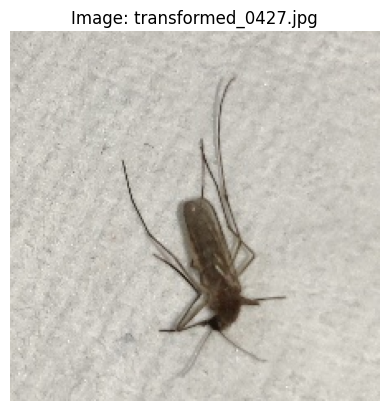

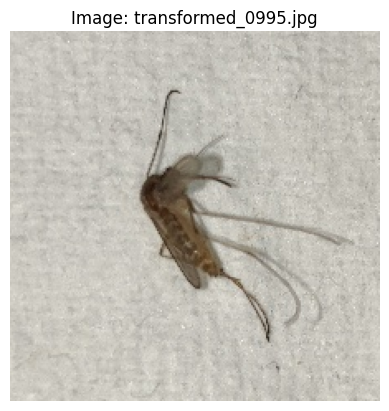

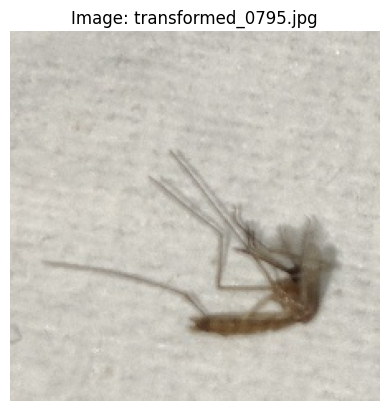

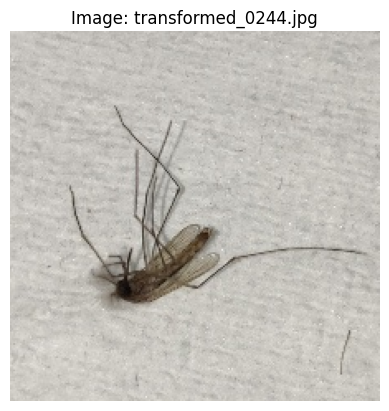

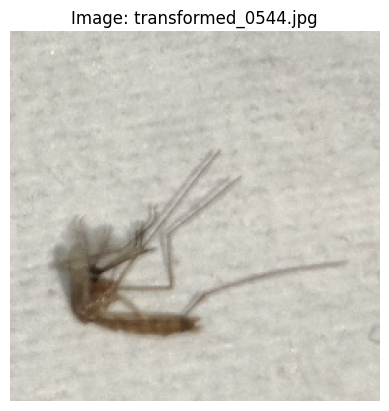

In [8]:
img_dir = './Mosquito_dataset/CULEX'  # can also check other species

image_files = os.listdir(img_dir)[:5]

# Show a few images
for file in image_files:
    img_path = os.path.join(img_dir, file)
    img = Image.open(img_path)

    plt.imshow(img)
    plt.title(f"Image: {file}")
    plt.axis('off')
    plt.show()

### Splitting Dataset into Train, Validation and Test

In [12]:
# Paths
data_dir = "mosquito_dataset_split"
img_size = (128, 128)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

In [13]:
img_size = (128, 128)
batch_size = 32



# Flow from directories
train_gen = train_datagen.flow_from_directory(
    directory=os.path.join(data_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    directory=os.path.join(data_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_gen = test_datagen.flow_from_directory(
    directory=os.path.join(data_dir, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [5]:

model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model_1.summary()

/home/linet/Documents/Flatiron/MOSQUITO_PROJECT/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-16 22:44:19.620374: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
history = model_1.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    #verbose=True
)

Epoch 1/20


/home/linet/Documents/Flatiron/MOSQUITO_PROJECT/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 319ms/step - accuracy: 0.4131 - loss: 1.4137 - val_accuracy: 0.6356 - val_loss: 0.6378
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - accuracy: 0.7349 - loss: 0.5696 - val_accuracy: 0.9111 - val_loss: 0.2734
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 278ms/step - accuracy: 0.8797 - loss: 0.3094 - val_accuracy: 0.9222 - val_loss: 0.2350
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.9188 - loss: 0.2075 - val_accuracy: 0.9289 - val_loss: 0.2064
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 270ms/step - accuracy: 0.9461 - loss: 0.1467 - val_accuracy: 0.8556 - val_loss: 0.3254
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 277ms/step - accuracy: 0.9425 - loss: 0.1525 - val_accuracy: 0.9244 - val_loss: 0.2383
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - accuracy: 0.9815 - loss: 0.0692 - val_accuracy: 0.9356 - val_loss: 0.1667
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 301ms/step - accuracy: 0.9889 - loss: 0.0419 - val_accuracy: 0.935

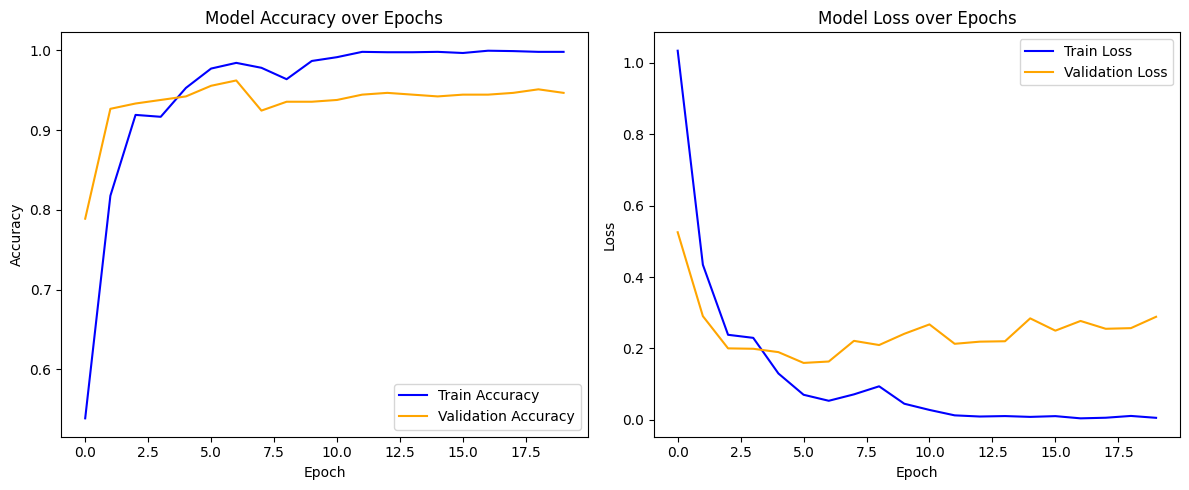

In [22]:

# Accuracy Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
# Get predictions
pred_probs = model_1.predict(test_gen)  # probabilities
pred_classes = np.argmax(pred_probs, axis=1)  # actual class indices


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


In [17]:

# Evaluate
loss, acc = model_1.evaluate(test_gen)
print(f"Test Accuracy: {acc:.2f}")


/home/linet/Documents/Flatiron/MOSQUITO_PROJECT/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9572 - loss: 0.2567
Test Accuracy: 0.96


In [17]:
true_classes = test_gen.classes  # actual labels from directory
class_labels = list(test_gen.class_indices.keys())


In [18]:
for i in range(10):
    pred = class_labels[pred_classes[i]]
    true = class_labels[true_classes[i]]
    print(f"Image {i+1}: Predicted = {pred}, Actual = {true}")


Image 1: Predicted = AEDES, Actual = AEDES
Image 2: Predicted = AEDES, Actual = AEDES
Image 3: Predicted = AEDES, Actual = AEDES
Image 4: Predicted = AEDES, Actual = AEDES
Image 5: Predicted = AEDES, Actual = AEDES
Image 6: Predicted = AEDES, Actual = AEDES
Image 7: Predicted = AEDES, Actual = AEDES
Image 8: Predicted = AEDES, Actual = AEDES
Image 9: Predicted = AEDES, Actual = AEDES
Image 10: Predicted = AEDES, Actual = AEDES


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


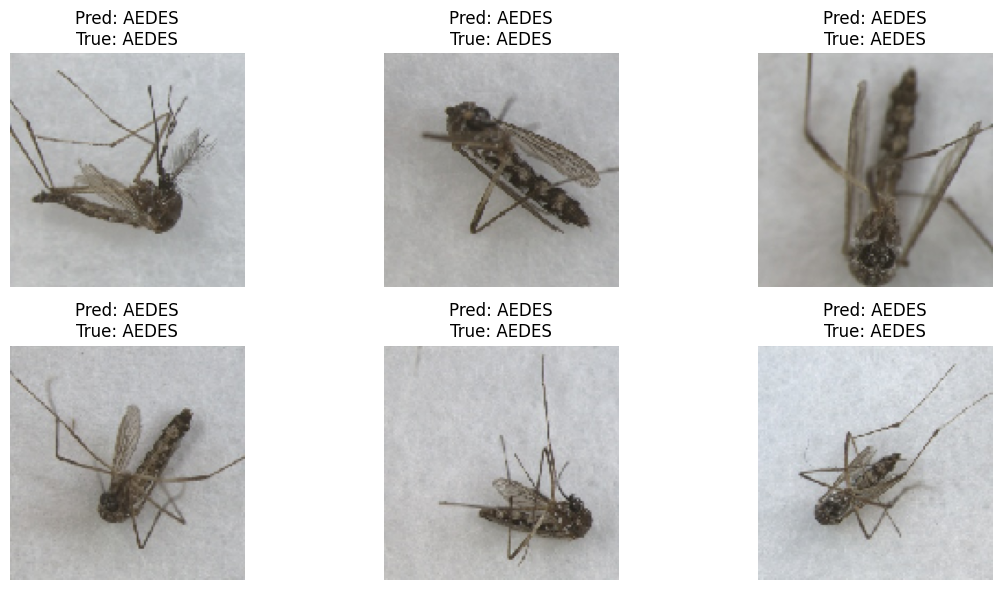

In [20]:
# Load one batch from test_gen
images, labels = next(test_gen)

plt.figure(figsize=(12, 6))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    pred_label = class_labels[np.argmax(model_1.predict(images[i][np.newaxis, ...]))]
    true_label = class_labels[np.argmax(labels[i])]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()


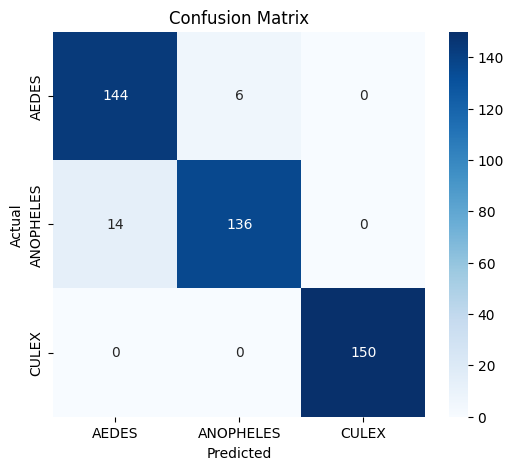


Classification Report:

              precision    recall  f1-score   support

       AEDES       0.91      0.96      0.94       150
   ANOPHELES       0.96      0.91      0.93       150
       CULEX       1.00      1.00      1.00       150

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

### Model 2 : augmented

In [4]:

# Paths
train_dir = "Mosquito_dataset_split/train"
val_dir = "Mosquito_dataset_split/val"
test_dir = "Mosquito_dataset_split/test"

# Parameters
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Load datasets
train_ds = image_dataset_from_directory(train_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE)
val_ds = image_dataset_from_directory(val_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE)
test_ds = image_dataset_from_directory(test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE)

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# Define CNN model with augmentation and normalization
model_2 = Sequential([
    # Augmentation
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    
    # Normalize pixels to [0, 1]
    Rescaling(1./255),

    # CNN layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes
])

# Compile model
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_2.fit(train_ds, validation_data=val_ds, epochs=20)


Found 2100 files belonging to 3 classes.
Found 450 files belonging to 3 classes.
Found 450 files belonging to 3 classes.
Epoch 1/20


2025-07-16 21:33:01.646549: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/linet/Documents/Flatiron/MOSQUITO_PROJECT/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 351ms/step - accuracy: 0.3590 - loss: 1.7656 - val_accuracy: 0.6778 - val_loss: 0.7479
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 340ms/step - accuracy: 0.6239 - loss: 0.7924 - val_accuracy: 0.7467 - val_loss: 0.4822
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 348ms/step - accuracy: 0.8011 - loss: 0.4917 - val_accuracy: 0.8289 - val_loss: 0.3957
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 353ms/step - accuracy: 0.8662 - loss: 0.3185 - val_accuracy: 0.8356 - val_loss: 0.4206
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 360ms/step - accuracy: 0.9007 - loss: 0.2559 - val_accuracy: 0.7689 - val_loss: 0.7360
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 364ms/step - accuracy: 0.9124 - loss: 0.2254 - val_accuracy: 0.9022 - val_loss: 0.2974
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 343ms/step - accuracy: 0.9026 - loss: 0.2774 - val_accuracy: 0.8733 - val_loss: 0.3186
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 356ms/step - accuracy: 0.9220 - loss: 0.2053 - val_accuracy: 0.846

In [5]:

# Evaluate
loss, acc = model_2.evaluate(test_ds)
print(f"Test Accuracy: {acc:.2f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8973 - loss: 0.2654
Test Accuracy: 0.91
